In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt

In [2]:
df_min = pd.read_csv("2m_insertedobjects_min", sep="\t", header=None)
df_min.columns = ["rectime", "id", "mval", "mmin", "mmax"]
df_min.rectime = df_min.rectime.apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))
alicdb1_min = df_min[df_min.id == 4]
alicdb2_min = df_min[df_min.id == 11]
df_avg = pd.read_csv("2m_insertedobjects_r", sep="\t", header=None)
df_avg.columns = ["rectime", "id", "mval", "mmin", "mmax"]
df_avg.rectime = df_avg.rectime.apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))
alicdb1_avg = df_avg[df_avg.id == 2]
alicdb2_avg = df_avg[df_avg.id == 9]

Początek - surowe wykresy

<AxesSubplot:xlabel='rectime'>

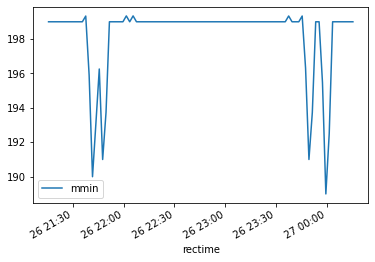

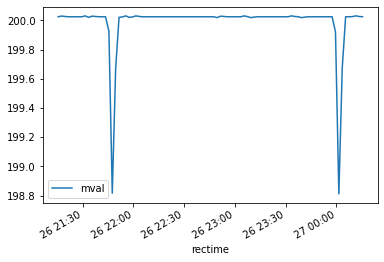

In [8]:
alicdb2_min.plot.line(x="rectime", y = "mmin")
alicdb2_avg.plot.line(x="rectime", y = "mval")

Problemy:
- brak tytułów
- dwa wykresy dotyczące tego samego 
- brak dobrze podpisanych osi (opis + jednostka)
- brak siatki
- brak skrajnych wartości na osi y - wykres 1
- puste miejsca po prawej i lewej stronie
- nazwy w legendzie niewiele mówią

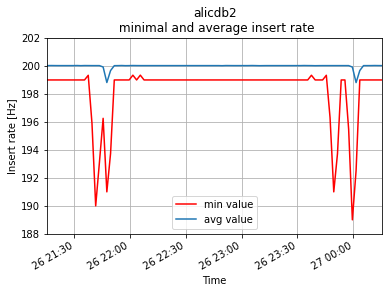

In [12]:
ax = alicdb2_min.plot.line(
    x="rectime", y = "mmin", # dane
    title="alicdb2\n minimal and average insert rate", 
    c="r", # kolor
    label = "min value") # nazwa w legendzie
alicdb2_avg.plot.line(x="rectime", y = "mval", ax = ax, label = "avg value")

ax.set_xlabel("Time")               # Podpisanie osi
ax.set_ylabel("Insert rate [Hz]")

plt.grid(True, which="major", axis="both")  # siatka

ax.set_yticks([188, 190, 192, 194, 196, 198, 200, 202])  # wartości na siatce, czasem warto wprowadzić ręcznie

ax.set_xlim(alicdb2_min.rectime.min(), alicdb2_min.rectime.max()) # a czasem wystarczy je sensownie ograniczyć

plt.savefig("minimal_and_avg_insert_rate_alicdb2.png")  # można zapisać do pliku

Poniżej to samo, tylko raczej jako przybornik - wrzucone jest więcej funkcji. Ważniejsze - notacja texowa, scatter, szerokość linii czy punktów

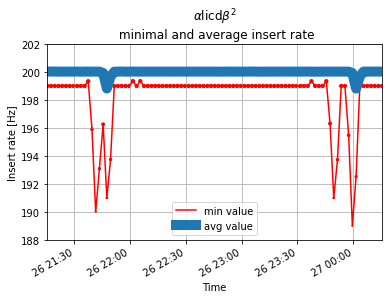

In [16]:
ax = alicdb2_min.plot.scatter(
    x="rectime", y = "mmin", 
    title=r"$\alpha$licd$\beta^{2}$" + "\n minimal and average insert rate",   # tex notation in titles
    c="r", 
    marker=".",
    s = (alicdb2_min.mmin - 188) * 4)
alicdb2_min.plot.line(
    x="rectime", 
    y = "mmin", 
    ax = ax, 
    c="r", 
    label = "min value")
alicdb2_avg.plot.line(x="rectime", y = "mval", ax = ax, label = "avg value", linewidth = 10)

ax.set_xlabel("Time")
ax.set_ylabel("Insert rate [Hz]")

plt.grid(True, which="major", axis="both")

ax.set_yticks([188, 190, 192, 194, 196, 198, 200, 202])

ax.set_xlim(alicdb2_min.rectime.min(), alicdb2_min.rectime.max())

plt.savefig("minimal_and_avg_insert_rate_alicdb2.png")